In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#READING THE DATA FROM DATASET
data=pd.read_csv('zomato.csv',encoding='unicode_escape')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df=pd.read_csv('Country-Code.csv')


In [4]:
data=pd.merge (data,df)

In [5]:
data.shape

(9551, 22)

In [6]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [9]:
data['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [10]:
data['Country Code'].value_counts()[1]

8652

from value count it has been checked that max.no of restaurant are from india.so converting other currency to indian currency rupees

1 Botswana Pula=6.24 indian rupees,
1 Brazilian Real(R$)=6.25 ,
1 Dollar($)=81.92 ,
1 Emirati Diram(AED)=22.31 ,
1 NewZealand($)= 50.35 ,
1 pound =102 ,
1 Qatari Rial(QR)=22.50 ,
1 Rand(R)=4.52 ,
1 Sri Lankan Rupee(LKR)=0.25 , 
1 Turkish Lira(TL)=0.24,
1 Indonesian Rupiah(IDR)=0.0055

In [11]:
ind=np.where((data['Currency'])=="Botswana Pula(P)")

In [12]:
ind

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21], dtype=int64),)

In [13]:
for i in ind:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*6.24
else:
    pass

In [14]:
data['Average Cost for two']

0        6864.0
1        7488.0
2       24960.0
3        9360.0
4        9360.0
         ...   
9546       80.0
9547      105.0
9548      170.0
9549      120.0
9550       55.0
Name: Average Cost for two, Length: 9551, dtype: float64

In [15]:
ind=np.where((data['Currency'])=="Botswana Pula(P)")
for i in ind:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*6.24

In [16]:
ind1=np.where((data['Currency'])=="Brazilian Real(R )")
for i in ind1:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*6.25

In [17]:
ind2=np.where((data['Currency'])=="𝐷𝑜𝑙𝑙𝑎𝑟()")
for i in ind2:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*81.92

In [18]:
ind3=np.where((data['Currency'])=="Emirati Diram(AED)")
for i in ind3:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*22.31

In [19]:
ind4=np.where((data['Currency'])=="NewZealand($)")
for i in ind4:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*50.35

In [20]:
ind5=np.where((data['Currency'])=="pound")
for i in ind5:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*102

In [21]:
ind6=np.where((data['Currency'])=="Qatari Rial(QR)")
for i in ind6:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*22.50

In [22]:
ind7=np.where((data['Currency'])=="Rand(R)")
for i in ind7:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*4.52

In [23]:
ind8=np.where((data['Currency'])=="Sri Lankan Rupee(LKR)")
for i in ind8:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*0.25

In [24]:
ind9=np.where((data['Currency'])=="Turkish Lira(TL)")
for i in ind9:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*0.24

In [25]:
ind10=np.where((data['Currency'])=="Indonesian Rupiah(IDR)")
for i in ind10:
    data['Average Cost for two'][i]=data['Average Cost for two'][i]*0.0055

In [26]:
data['Average Cost for two']

0        42831.36
1        46725.12
2       155750.40
3        58406.40
4        58406.40
          ...    
9546        19.20
9547        25.20
9548        40.80
9549        28.80
9550        13.20
Name: Average Cost for two, Length: 9551, dtype: float64

since all the currency has been converted into rupees droping currency column

In [27]:
data=data.drop(columns=['Currency'])

from data set it can be observed that address,locality and locality verbose are showing address nearby address only so considering only locality.

In [28]:
data=data.drop(columns=['Address','Locality'])

we can analysed that in feature Switch to order menu there is only one count so droping the same column

In [29]:
data=data.drop(columns=['Switch to order menu'])

In dataset since restaurant name and restaurant id is given both are given so considering only restaurant id and droping restaurant name from data set

In [30]:
data=data.drop(columns=['Restaurant Name'])


In [31]:
data

,Restaurant ID,Country Code,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,162,Makati City,"Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",42831.36,Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,162,Makati City,"Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,46725.12,Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",155750.40,Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",58406.40,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",58406.40,Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,19.20,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,208,ÛÁstanbul,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",25.20,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",40.80,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,28.80,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [32]:
X=data.drop(columns=['Average Cost for two','Price range'])


In [33]:
Y=data['Average Cost for two']

In [34]:
Z=data['Price range']

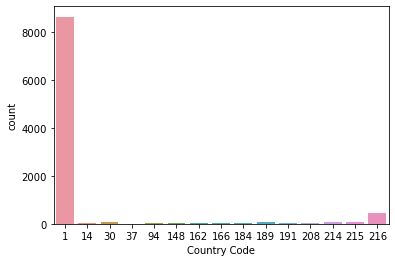

In [35]:
sns.countplot(x ='Country Code', data = data)
plt.show()

country code 1 is for india so it can be seen that maximum restaurant are covered from india.


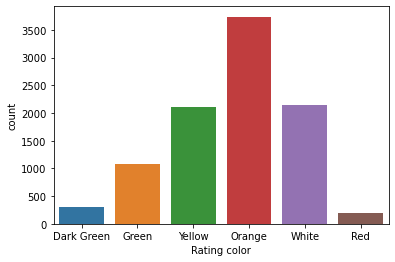

In [36]:
sns.countplot(x ='Rating color', data = data)
plt.show()

rating color is highest for orange color

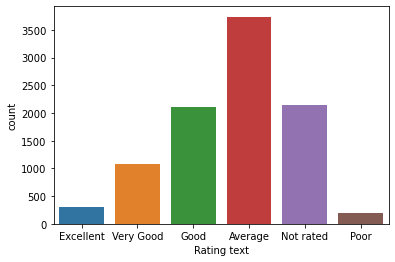

In [37]:
sns.countplot(x ='Rating text', data = data)
plt.show()

average rating text is showing highest amoong all the rating text

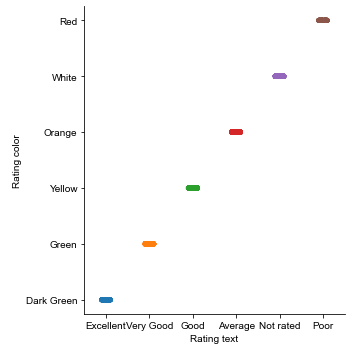

In [38]:
sns.catplot(y ='Rating color' , x = 'Rating text',data=data)
sns.set(rc={'figure.figsize':(70,100)})

from above it can be predicted that for particular rating color their is particular rating text  that is darkgreen for excellent,green for very good,yellow for good,orange for average,white for not rated and poor for red

This may cause multicolinearity so droping one of column rating color 

In [39]:
data=data.drop(columns=['Rating color'])

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Has Table booking'])
data['Has Table booking']=df

In [42]:
df2=lab_enc.fit_transform(data['Has Online delivery'])
data['Has Online delivery']=df2

In [43]:
df3=lab_enc.fit_transform(data['Is delivering now'])
data['Is delivering now']=df3

In [44]:
df4=lab_enc.fit_transform(data['Country'])
data['Country']=df4

In [45]:
data.head()

,Restaurant ID,Country Code,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,162,Makati City,"Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",42831.36,1,0,0,3,4.8,Excellent,314,6
1,6304287,162,Makati City,"Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,46725.12,1,0,0,3,4.5,Excellent,591,6
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",155750.40,1,0,0,4,4.4,Very Good,270,6
3,6318506,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",58406.40,0,0,0,4,4.9,Excellent,365,6
4,6314302,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",58406.40,1,0,0,4,4.8,Excellent,229,6


In [46]:
data_dummies=pd.get_dummies(data=data,columns=['City','Locality Verbose','Cuisines','Rating text'],drop_first=True)
data_dummies

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,...,"Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,121.027535,14.565443,42831.36,1,0,0,3,4.8,...,0,0,0,0,0,1,0,0,0,0
1,6304287,162,121.014101,14.553708,46725.12,1,0,0,3,4.5,...,0,0,0,0,0,1,0,0,0,0
2,6300002,162,121.056831,14.581404,155750.40,1,0,0,4,4.4,...,0,0,0,0,0,0,0,0,0,1
3,6318506,162,121.056475,14.585318,58406.40,0,0,0,4,4.9,...,0,0,0,0,0,1,0,0,0,0
4,6314302,162,121.057508,14.584450,58406.40,1,0,0,4,4.8,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,19.20,0,0,0,3,4.1,...,0,0,0,0,0,0,0,0,0,1
9547,5908749,208,29.041297,41.009847,25.20,0,0,0,3,4.2,...,0,0,0,0,1,0,0,0,0,1
9548,5915807,208,29.034640,41.055817,40.80,0,0,0,4,3.7,...,0,0,0,0,0,0,1,0,0,0
9549,5916112,208,29.036019,41.057979,28.80,0,0,0,4,4.0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
data=data_dummies

In [48]:
X=data.drop(columns=['Price range','Average Cost for two'])

In [49]:
y=data['Average Cost for two']

In [50]:
z=data['Price range']

In [51]:
X

,Restaurant ID,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Country,...,"Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,121.027535,14.565443,1,0,0,4.8,314,6,...,0,0,0,0,0,1,0,0,0,0
1,6304287,162,121.014101,14.553708,1,0,0,4.5,591,6,...,0,0,0,0,0,1,0,0,0,0
2,6300002,162,121.056831,14.581404,1,0,0,4.4,270,6,...,0,0,0,0,0,0,0,0,0,1
3,6318506,162,121.056475,14.585318,0,0,0,4.9,365,6,...,0,0,0,0,0,1,0,0,0,0
4,6314302,162,121.057508,14.584450,1,0,0,4.8,229,6,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,0,0,0,4.1,788,11,...,0,0,0,0,0,0,0,0,0,1
9547,5908749,208,29.041297,41.009847,0,0,0,4.2,1034,11,...,0,0,0,0,1,0,0,0,0,1
9548,5915807,208,29.034640,41.055817,0,0,0,3.7,661,11,...,0,0,0,0,0,0,1,0,0,0
9549,5916112,208,29.036019,41.057979,0,0,0,4.0,901,11,...,0,0,0,0,0,0,0,0,0,1


In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression

In [53]:
select = SelectKBest(score_func=f_regression, k=30)
X_new = select.fit_transform(X, y)
print("After selecting best features:", X_new.shape)


After selecting best features: (9551, 30)


In [56]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_new)

In [61]:
X_scaled

array([[ 2.69218148e+00,  6.90977568e+01, -2.04689957e-02, ...,
        -1.02328902e-02, -1.02328902e-02,  5.54354553e+00],
       [ 2.69218148e+00,  6.90977568e+01, -2.04689957e-02, ...,
        -1.02328902e-02, -1.02328902e-02,  5.54354553e+00],
       [ 2.69218148e+00, -1.44722498e-02,  4.88543754e+01, ...,
         9.77241014e+01, -1.02328902e-02, -1.80389968e-01],
       ...,
       [-3.71445985e-01, -1.44722498e-02, -2.04689957e-02, ...,
        -1.02328902e-02, -1.02328902e-02, -1.80389968e-01],
       [-3.71445985e-01, -1.44722498e-02, -2.04689957e-02, ...,
        -1.02328902e-02, -1.02328902e-02, -1.80389968e-01],
       [-3.71445985e-01, -1.44722498e-02, -2.04689957e-02, ...,
        -1.02328902e-02, -1.02328902e-02, -1.80389968e-01]])

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.20,random_state=44)
y_train.head()

281       10.0
1665     700.0
6622     500.0
6282     250.0
568     2231.0
Name: Average Cost for two, dtype: float64

Random forest regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = reg_rf.predict(x_test)

In [71]:
reg_rf.score(x_train, y_train)

0.8973734522733985

In [72]:
reg_rf.score(x_test, y_test)

0.3110590787946872

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test,y_pred)

0.3110590787946872

adaboost

In [75]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
ada=AdaBoostRegressor()

In [77]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [78]:
ada.score(x_train, y_train)

0.6475550895708222

In [79]:
y_pred1=ada.predict(x_train)

In [80]:
from sklearn import metrics

In [81]:
accuracy=metrics.r2_score(y_train,y_pred1)
accuracy

0.6475550895708222

In [82]:
y_test_pred=ada.predict(x_test)

In [83]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.12720992038833312

Xgboost

In [84]:
import xgboost as xgb

In [85]:
xgb=xgb.XGBRegressor()

In [86]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [87]:
xgb.score(x_train, y_train)

0.9571103264168774

In [88]:
xgb.score(x_test, y_test)

0.536731218433069

In [89]:
y_pred3=xgb.predict(x_test)

In [90]:
r2_score(y_test,y_pred3)

0.536731218433069